# Detecting Phishing Emails Using Machine Learning

## Problem statement: 
- This project aims to build a classification model to determine whether an email is a phishing attempt or a legitimate message. By analyzing features of emails such as sender information, attempt or a legitimate message. By analyzing features of emails such as sender information, content, and embedded links, the model will help in identifying phishing emails to improve cybersecurity. 

### TASK:

Our prediction task is to predict whether the email is phishing or non-phishing.


The output variable is the Machine status.( 1 – phishing, 0 – non-phishing) The output variable shows the model prediction of the Machine status given the specific set of input/features, which is the specifications of the machine.

In [1]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
#importing all the algorythm
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
#IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
import textwrap
from tabulate import tabulate
from IPython.display import Markdown
from sklearn.metrics import accuracy_score

After Data Preprocessing: Data Collection, Data Cleaning, Feature Engineering and Analysis done in another file, this is the data we have obtained.




In [3]:
# load dataset
df = pd.read_csv("finalized_combined_df.csv", header=0)
df

,subject,body,subject_caps_percent,body_caps_percent,subject_word_count,body_word_count,unigram_count,bigram_count,trigram_count,unigram_percent,composite_score,url_label,label
0,commiss card,i am work on thi card for andi zipper and dan ...,14.29,7.02,2,35,0,0,0,0.00,-0.51,0,0
1,joint ventur urgent respons need,from the desk of dr richard akuez director pro...,6.25,9.87,5,276,17,2,0,6.05,2.72,1,1
2,fia group project,attach is a word doc of some basic articl from...,0.00,1.39,3,281,6,1,0,2.11,0.72,0,0
3,immedi attent,from mr charl nwodo univers trust bank websit ...,11.11,4.18,2,609,30,3,0,4.91,5.02,0,1
4,veri urgent and confidenti,from the desk of of hassan musa the head of fi...,100.00,6.94,4,584,37,1,0,6.29,5.48,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,you have reciev new file,monkey org file notif hello jose you have new ...,21.74,6.40,5,70,1,0,0,1.33,-0.35,1,1
9066,rv staff email access,dear staff your e mailbox password will soon e...,22.22,5.60,4,113,6,2,0,5.13,1.03,0,1
9067,confirm thi transact,confirm your transact confirm your transact fo...,9.09,6.77,3,281,13,0,0,4.58,1.49,1,1
9068,dynegi power corp master,we have a realli old agreement with the refere...,19.05,4.23,4,60,0,0,0,0.00,-0.51,0,0




- After reviewing the training data size, it's essential to ensure that a sufficient amount of data is collected for reliable predictions. We also examined the number of features and their types before selecting a set of models to evaluate their performance
 

In [3]:
print(df.shape)
print(list(df.columns))

(9070, 13)
['subject', 'body', 'subject_caps_percent', 'body_caps_percent', 'subject_word_count', 'body_word_count', 'unigram_count', 'bigram_count', 'trigram_count', 'unigram_percent', 'composite_score', 'url_label', 'label']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9070 entries, 0 to 9069
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject               9070 non-null   object 
 1   body                  9070 non-null   object 
 2   subject_caps_percent  9070 non-null   float64
 3   body_caps_percent     9070 non-null   float64
 4   subject_word_count    9070 non-null   int64  
 5   body_word_count       9070 non-null   int64  
 6   unigram_count         9070 non-null   int64  
 7   bigram_count          9070 non-null   int64  
 8   trigram_count         9070 non-null   int64  
 9   unigram_percent       9070 non-null   float64
 10  composite_score       9070 non-null   float64
 11  url_label             9070 non-null   int64  
 12  label                 9070 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 921.3+ KB


In [5]:
df.isnull().sum()

subject                 0
body                    0
subject_caps_percent    0
body_caps_percent       0
subject_word_count      0
body_word_count         0
unigram_count           0
bigram_count            0
trigram_count           0
unigram_percent         0
composite_score         0
url_label               0
label                   0
dtype: int64

We then visualized the dataset to get a clearer idea on the dataset and make sure it is balanced, meaning there are same number between the 2 classes:
 - Countplot to show the count of the label: 1 (phishing) and 0 (non-phishing)
 - Pie Chart for the the show the percentage of the label

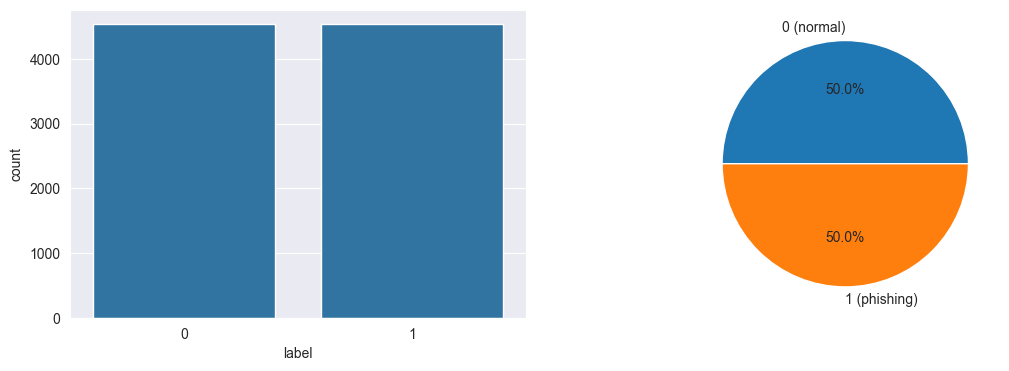

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with specific size
f = plt.figure(figsize=(20, 4))

# First subplot: Countplot
ax1 = f.add_subplot(1, 3, 1)
sns.countplot(x='label', data=df, ax=ax1)

# Second subplot: Pie chart
ax2 = f.add_subplot(1, 3, 2)
b = df['label'].value_counts(normalize=True) * 100
my_labels = ['0 (normal)', '1 (phishing)']
ax2.pie(b, labels=my_labels, autopct='%1.1f%%')

# Show the plot
plt.show()


In [6]:
df.isnull().sum()

subject                 0
body                    0
subject_caps_percent    0
body_caps_percent       0
subject_word_count      0
body_word_count         0
unigram_count           0
bigram_count            0
trigram_count           0
unigram_percent         0
composite_score         0
url_label               0
label                   0
dtype: int64

- We dropped certain columns 'subject' and 'body as it has been split into multiple numerical columns. Then we split the dataset into X, which is our features and y, the target variable.

In [4]:
X = df.drop(['label', 'subject', 'body'], axis=1)
y= df['label']
print(X.shape)
print(y.shape)

(9070, 10)
(9070,)


In [8]:
df.columns

Index(['subject', 'body', 'subject_caps_percent', 'body_caps_percent',
       'subject_word_count', 'body_word_count', 'unigram_count',
       'bigram_count', 'trigram_count', 'unigram_percent', 'composite_score',
       'url_label', 'label'],
      dtype='object')

In [23]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state=42, stratify=y)

We then tested out 2 different types of scalers (StandardScaler and MinMaxScaler) and 
concluded to use Standard Scaler as the linear models' scores are affected more while the tree based models' scores are not really affected

StandardScaler 
- follows a normal-like distribution
    
MinMaxScaler 
- Works well on data that is NOT normally distributed (bell_shaped)
- Does not perform well with outliers

In [13]:
# Define models
models = {
    'Knn': KNeighborsClassifier(),
    'GausNB': GaussianNB(),
    'LogReg': LogisticRegression(),
    'DecTree': DecisionTreeClassifier(),
    'SVC': SVC(),
    'RForest': RandomForestClassifier()
}

# Initialize results DataFrame for each scaler
StandardScaler_Result = pd.DataFrame(columns=["Model", "Precision", "Recall", "Fscore", "Accuracy"])
MinMaxScaler_Result = pd.DataFrame(columns=["Model", "Precision", "Recall", "Fscore", "Accuracy"])

# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Loop through scalers and models
for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        pipe = Pipeline([
            (scaler_name, scaler),
            (model_name, model)
        ])
        
        pipe.fit(X_train, y_train)
        
        y_pred = pipe.predict(X_test)
        
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)
        
        precision = f"{precision * 100:.2f}%"
        recall = f"{recall * 100:.2f}%"
        fscore = f"{fscore * 100:.2f}%"
        accuracy = f"{accuracy * 100:.2f}%"
        
        # Append the results to the appropriate DataFrame
        result = pd.DataFrame({
            "Model": [model_name],
            "Precision": [precision],
            "Recall": [recall],
            "Fscore": [fscore],
            "Accuracy": [accuracy]
        })
        
        if scaler_name == 'StandardScaler':
            StandardScaler_Result = pd.concat([StandardScaler_Result, result], ignore_index=True)
        else:
            MinMaxScaler_Result = pd.concat([MinMaxScaler_Result, result], ignore_index=True)

# Display labeled tables
print("StandardScaler Results:")
std_table = tabulate(StandardScaler_Result, headers='keys', tablefmt='pretty', showindex=False)
print(std_table)

print("\nMinMaxScaler Results:")
minmax_table = tabulate(MinMaxScaler_Result, headers='keys', tablefmt='pretty', showindex=False)
print(minmax_table)

StandardScaler Results:
+---------+-----------+--------+--------+----------+
|  Model  | Precision | Recall | Fscore | Accuracy |
+---------+-----------+--------+--------+----------+
|   Knn   |  92.67%   | 92.67% | 92.67% |  92.67%  |
| GausNB  |  87.42%   | 86.77% | 86.71% |  86.77%  |
| LogReg  |  91.15%   | 91.07% | 91.07% |  91.07%  |
| DecTree |  90.20%   | 90.19% | 90.19% |  90.19%  |
|   SVC   |  93.50%   | 93.50% | 93.49% |  93.50%  |
| RForest |  93.72%   | 93.72% | 93.72% |  93.72%  |
+---------+-----------+--------+--------+----------+

MinMaxScaler Results:
+---------+-----------+--------+--------+----------+
|  Model  | Precision | Recall | Fscore | Accuracy |
+---------+-----------+--------+--------+----------+
|   Knn   |  92.61%   | 92.61% | 92.61% |  92.61%  |
| GausNB  |  87.42%   | 86.77% | 86.71% |  86.77%  |
| LogReg  |  90.57%   | 90.41% | 90.40% |  90.41%  |
| DecTree |  90.20%   | 90.19% | 90.19% |  90.19%  |
|   SVC   |  93.28%   | 93.27% | 93.27% |  93.27%  |

- We used the GridSearchCV function in the sklearn module, which carries out an exhaustive search over specified parameter values for an estimator.

- For example, for our KNeighbors model, we used GridSearchCV to 
determine the best hyperparameters (weights, leaf_size, n_neighbors and p) which makes the model perform best with a list of parameters.

- Another example, for our LogisticRegression model, we used GridSearchCV to 
determine the best hyperparameters (C, fit_intercept, tol and solver) which makes the model perform best with a list of parameters.

- We then did this to all the other models with their respective parameters

Fitting 5 folds for each of 760 candidates, totalling 3800 fits
Knn:
Classification Report:
                  precision    recall  f1-score   support

               0       0.94      0.93      0.94       907
               1       0.93      0.94      0.94       907

        accuracy                           0.94      1814
       macro avg       0.94      0.94      0.94      1814
    weighted avg       0.94      0.94      0.94      1814

Confusion Matrix:
    [[843  64]
     [ 51 856]]
Accuracy: 93.01%
Best Parameters: {'Knn__leaf_size': 1, 'Knn__n_neighbors': 14, 'Knn__p': 1, 'Knn__weights': 'distance'}
ROC AUC Score: 97.95%
Fitting 5 folds for each of 20 candidates, totalling 100 fits
GausNB:
Classification Report:
                  precision    recall  f1-score   support

               0       0.82      0.93      0.88       907
               1       0.92      0.80      0.86       907

        accuracy                           0.87      1814
       macro avg       0.87      0.87 

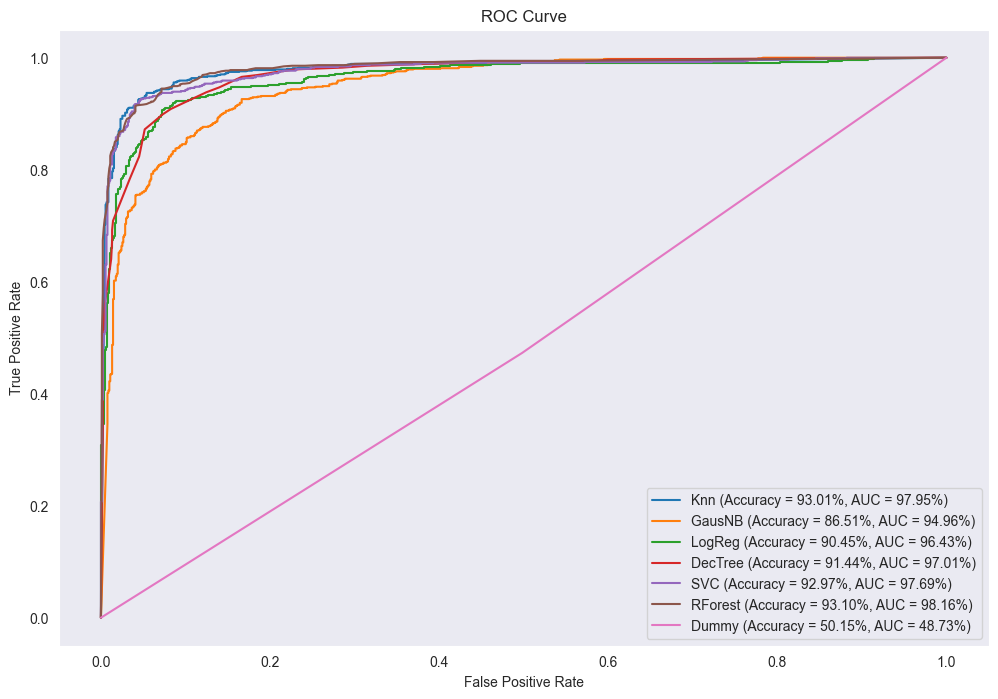

,roc_Score,Accuracy,Confusion Matrix
Knn,97.95%,93.01%,[[843 64] [ 51 856]]
GausNB,94.96%,86.51%,[[847 60] [180 727]]
LogReg,96.43%,90.45%,[[846 61] [101 806]]
DecTree,97.01%,91.44%,[[841 66] [ 92 815]]
SVC,97.69%,92.97%,[[851 56] [ 62 845]]
RForest,98.16%,93.10%,[[842 65] [ 55 852]]
Dummy,48.73%,50.15%,[[439 468] [456 451]]


In [12]:
#hyperparameter tuning and get the ROC AUC Score
models = {'Knn': KNeighborsClassifier(),
          'GausNB': GaussianNB(),
          'LogReg' :LogisticRegression(),
          'DecTree': DecisionTreeClassifier(),
          'SVC': SVC(),
          'RForest': RandomForestClassifier(),
          'Dummy': DummyClassifier()
         }

params = {
    'Knn': {
        'Knn__n_neighbors': list(range(5, 15)),  # Broader range for neighbors
        'Knn__weights': ['uniform', 'distance'],  # Both options
        'Knn__leaf_size': list(range(1, 20)),  # Wider range of leaf sizes
        'Knn__p': [1, 2]  # Manhattan and Euclidean distances
    },
    'GausNB': {
        'GausNB__var_smoothing': np.logspace(-9, -1, 20)  # Wider range for smoothing
    },
    'LogReg': {
        'LogReg__C': np.logspace(0, 4, 10),  # Broader range for regularization
        'LogReg__fit_intercept': [True, False],  # Test both intercept options
        'LogReg__solver': ['lbfgs', 'liblinear', 'saga'],  # More solver options
        'LogReg__tol': [1e-5, 1e-4, 1e-3]  # Broader tolerance range
    },
    'DecTree': {
        'DecTree__criterion': ['gini', 'entropy'],  # Both criteria
        'DecTree__max_depth': list(range(3, 15)),  # Larger range of tree depths
        'DecTree__min_samples_leaf': [0.01, 0.05, 0.1, 0.2],  # Broader range of leaf sizes
        'DecTree__min_samples_split': [0.01, 0.05, 0.1, 0.2],  # More split sizes
        'DecTree__max_features': ['sqrt', 'log2', None]  # More feature options
    },
    'SVC': {
        'SVC__C': [0.1, 1, 10, 100],  # Wider range of C values
        'SVC__gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Broader range for gamma
        'SVC__kernel': ['rbf'],  # Start with RBF kernel
        'SVC__probability': [True]  # For ROC analysis
    },
    'Linear_SVC': {
        'Linear_SVC__C': [0.1, 1, 10, 100],  # Range of C values for linear kernel
        'Linear_SVC__fit_intercept': [True, False],  # Intercept options
        'Linear_SVC__tol': [1e-5, 1e-4, 1e-3],  # Tolerance options
    },
    'RForest': {
        'RForest__n_estimators': np.arange(100, 300, 50),  # Larger range of estimators
        'RForest__criterion': ['gini', 'entropy'],  # Both criteria
        'RForest__max_depth': np.arange(10, 50, 10),  # Wider range of tree depths
        'RForest__min_samples_split': [2, 5, 10],  # More split criteria
        'RForest__min_samples_leaf': [1, 2, 4],  # Broader range of leaf sizes
        'RForest__max_features': ['auto', 'sqrt', 'log2'],  # More feature selection methods
        'RForest__bootstrap': [True, False]  # Both bootstrapping options
    },
    'Dummy': {
        'Dummy__strategy': ['most_frequent', 'stratified']  # Both strategies for comparison
    }
}
roc_Score = []
accuracy_scores = []
confusion_matrices = []  # List to hold confusion matrices as strings

# Create a larger figure for the ROC plot
plt.figure(figsize=(12, 8))

for i in models:
    pipe = Pipeline([('StandardScalar', StandardScaler()), (i, models[i])])
    grid_search = GridSearchCV(pipe, params[i], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    print(f"{i}:")
    
    # Print Classification Report with indentation
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(textwrap.indent(report, "    "))
    
    # Print Confusion Matrix with indentation
    matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(str(matrix).replace("\n", ""))  # Convert confusion matrix to string and append
    print("Confusion Matrix:")
    print(textwrap.indent(str(matrix), "    "))
    
    # Find best scores, convert to percentage
    accuracy = grid_search.best_score_ * 100
    accuracy_scores.append(f"{accuracy:.2f}%")
    print(f"Accuracy: {accuracy:.2f}%")
    
    # Print Best Parameters without multiplying by 100
    print(f"Best Parameters: {grid_search.best_params_}")
    
    # Compute predicted probabilities using the best estimator
    y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

    # Generate ROC curve values
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate AUC Score as a percentage
    auc_score = roc_auc_score(y_test, y_pred_prob) * 100
    roc_Score.append(f"{auc_score:.2f}%")
    print(f"ROC AUC Score: {auc_score:.2f}%")

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{i} (Accuracy = {accuracy:.2f}%, AUC = {auc_score:.2f}%)')
    
# Configure the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Show the legend
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Create a DataFrame for ROC scores, accuracy, and confusion matrices
roc_df = pd.DataFrame({
        'roc_Score': roc_Score,
        'Accuracy': accuracy_scores,
        'Confusion Matrix': confusion_matrices}, index=models.keys())

# Display the DataFrame with ROC scores, accuracies, and confusion matrices
pd.DataFrame(roc_df)


From the plot above, we can see that based on ROC Curve comparison, Random Forest provided the best performance, roc score of 98.16%
as it occupies the curve at far left and the top, hence the area under the curve is close to zero.


### Reasons for using a dummy model:
1. The dummy classifier serves as a baseline by making predictions based on simple strategies, such as always predicting the most frequent class. It does not consider the features in the data, which results in poor performance. 

2. This baseline allows us to gauge how much our machine learning models are improving over random or naive predictions. As seen in the results, models like Random Forest, Decision Trees, and SVC perform significantly better in terms of precision, recall, F1-score, and accuracy, showing that they effectively utilize the input data to make informed predictions.

In [2]:
# Create the markdown table as a string
markdown_table = """
| Model      | Type 1 Errors | Type 1 Error Rate | Type 2 Errors | Type 2 Error Rate |
|------------|---------------|-------------------|---------------|-------------------|
| KNN        | 64            | 7.06%             | 51            | 5.62%             |
| GausNB     | 60            | 6.62%             | 180           | 19.83%            |
| LogReg     | 61            | 6.73%             | 101           | 11.14%            |
| DecTree    | 66            | 7.28%             | 92            | 10.14%            |
| SVC        | 56            | 6.17%             | 62            | 6.84%             |
| RForest    | 65            | 7.17%             | 55            | 6.06%             |
| Dummy      | 468           | 51.54%            | 456           | 50.28%            |
"""

# Display the markdown table
display(Markdown(markdown_table))


| Model      | Type 1 Errors | Type 1 Error Rate | Type 2 Errors | Type 2 Error Rate |
|------------|---------------|-------------------|---------------|-------------------|
| KNN        | 64            | 7.06%             | 51            | 5.62%             |
| GausNB     | 60            | 6.62%             | 180           | 19.83%            |
| LogReg     | 61            | 6.73%             | 101           | 11.14%            |
| DecTree    | 66            | 7.28%             | 92            | 10.14%            |
| SVC        | 56            | 6.17%             | 62            | 6.84%             |
| RForest    | 65            | 7.17%             | 55            | 6.06%             |
| Dummy      | 468           | 51.54%            | 456           | 50.28%            |


### From the confusion matrix above:
False Positive (Type 1 Error) : Machine learning model predicted machine status 1 but in reality machine status 
0.

False Negative (Type 2 Error) : Machine learning model predicted machine status 0 but in reality the machine status 1.

In [16]:
# Define models with best parameters
models = {
    'Knn': KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1, weights='distance'),
    'GausNB': GaussianNB(var_smoothing=1e-09),
    'LogReg': LogisticRegression(C=2.7825594022071245, fit_intercept=True, solver='saga', tol=0.001),
    'DecTree': DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=None, 
                                      min_samples_leaf=0.01, min_samples_split=0.01),
    'SVC': SVC(C=1, gamma='scale', kernel='rbf', probability=True),
    'RForest': RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=20, 
                                      max_features='log2', min_samples_leaf=1, 
                                      min_samples_split=2, n_estimators=250)
}

# Initialize results DataFrame for each scaler
StandardScaler_Result = pd.DataFrame(columns=["Model", "Precision", "Recall", "Fscore", "Accuracy"])
MinMaxScaler_Result = pd.DataFrame(columns=["Model", "Precision", "Recall", "Fscore", "Accuracy"])

# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Loop through scalers and models
for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        pipe = Pipeline([
            (scaler_name, scaler),
            (model_name, model)
        ])
        
        pipe.fit(X_train, y_train)
        
        y_pred = pipe.predict(X_test)
        
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
        accuracy = accuracy_score(y_test, y_pred)
        
        precision = f"{precision * 100:.2f}%"
        recall = f"{recall * 100:.2f}%"
        fscore = f"{fscore * 100:.2f}%"
        accuracy = f"{accuracy * 100:.2f}%"
        
        # Append the results to the appropriate DataFrame
        result = pd.DataFrame({
            "Model": [model_name],
            "Precision": [precision],
            "Recall": [recall],
            "Fscore": [fscore],
            "Accuracy": [accuracy]
        })
        
        if scaler_name == 'StandardScaler':
            StandardScaler_Result = pd.concat([StandardScaler_Result, result], ignore_index=True)
        else:
            MinMaxScaler_Result = pd.concat([MinMaxScaler_Result, result], ignore_index=True)

# Display labeled tables
print("StandardScaler Results:")
std_table = tabulate(StandardScaler_Result, headers='keys', tablefmt='pretty', showindex=False)
print(std_table)

print("\nMinMaxScaler Results:")
minmax_table = tabulate(MinMaxScaler_Result, headers='keys', tablefmt='pretty', showindex=False)
print(minmax_table)


StandardScaler Results:
+---------+-----------+--------+--------+----------+
|  Model  | Precision | Recall | Fscore | Accuracy |
+---------+-----------+--------+--------+----------+
|   Knn   |  93.62%   | 93.61% | 93.60% |  93.61%  |
| GausNB  |  87.42%   | 86.77% | 86.71% |  86.77%  |
| LogReg  |  91.15%   | 91.07% | 91.07% |  91.07%  |
| DecTree |  91.32%   | 91.29% | 91.29% |  91.29%  |
|   SVC   |  93.50%   | 93.50% | 93.49% |  93.50%  |
| RForest |  93.55%   | 93.55% | 93.55% |  93.55%  |
+---------+-----------+--------+--------+----------+

MinMaxScaler Results:
+---------+-----------+--------+--------+----------+
|  Model  | Precision | Recall | Fscore | Accuracy |
+---------+-----------+--------+--------+----------+
|   Knn   |  93.66%   | 93.66% | 93.66% |  93.66%  |
| GausNB  |  87.42%   | 86.77% | 86.71% |  86.77%  |
| LogReg  |  90.84%   | 90.74% | 90.73% |  90.74%  |
| DecTree |  91.32%   | 91.29% | 91.29% |  91.29%  |
|   SVC   |  93.28%   | 93.27% | 93.27% |  93.27%  |

In [18]:
# Define models with best parameters
models = {
    'Knn': KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1, weights='distance'),
    'GausNB': GaussianNB(var_smoothing=1e-09),
    'LogReg': LogisticRegression(C=2.7825594022071245, fit_intercept=True, solver='saga', tol=0.001),
    'DecTree': DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=None, 
                                      min_samples_leaf=0.01, min_samples_split=0.01),
    'SVC': SVC(C=1, gamma='scale', kernel='rbf', probability=True),
    'RForest': RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=20, 
                                      max_features='log2', min_samples_leaf=1, 
                                      min_samples_split=2, n_estimators=250)
}

# Initialize results DataFrame for each scaler
StandardScaler_Result = pd.DataFrame(columns=["Model", "Train CV Accuracy", "Test CV Accuracy"])
MinMaxScaler_Result = pd.DataFrame(columns=["Model", "Train CV Accuracy", "Test CV Accuracy"])

# Define scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Loop through scalers and models
for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        pipe = Pipeline([
            (scaler_name, scaler),
            (model_name, model)
        ])
        
        # Cross-validate on the training set
        cv_train = np.mean(cross_val_score(pipe, X_train, y_train, cv=10, n_jobs=-1))
        
        # Cross-validate on the test set
        cv_test = np.mean(cross_val_score(pipe, X_test, y_test, cv=10, n_jobs=-1))
        
        # Append the results to the appropriate DataFrame
        result = pd.DataFrame({
            "Model": [model_name],
            "Train CV Accuracy": [f"{cv_train * 100:.2f}%"],
            "Test CV Accuracy": [f"{cv_test * 100:.2f}%"]
        })
        
        if scaler_name == 'StandardScaler':
            StandardScaler_Result = pd.concat([StandardScaler_Result, result], ignore_index=True)
        else:
            MinMaxScaler_Result = pd.concat([MinMaxScaler_Result, result], ignore_index=True)

# Display labeled tables with Train CV and Test CV Accuracy
print("StandardScaler Results (Train CV Accuracy and Test CV Accuracy):")
std_table = tabulate(StandardScaler_Result, headers='keys', tablefmt='pretty', showindex=False)
print(std_table)

print("\nMinMaxScaler Results (Train CV Accuracy and Test CV Accuracy):")
minmax_table = tabulate(MinMaxScaler_Result, headers='keys', tablefmt='pretty', showindex=False)
print(minmax_table)


StandardScaler Results (Train CV Accuracy and Test CV Accuracy):
+---------+-------------------+------------------+
|  Model  | Train CV Accuracy | Test CV Accuracy |
+---------+-------------------+------------------+
|   Knn   |      92.90%       |      92.88%      |
| GausNB  |      86.62%       |      86.16%      |
| LogReg  |      90.46%       |      90.85%      |
| DecTree |      91.44%       |      91.01%      |
|   SVC   |      92.85%       |      93.05%      |
| RForest |      93.22%       |      92.94%      |
+---------+-------------------+------------------+

MinMaxScaler Results (Train CV Accuracy and Test CV Accuracy):
+---------+-------------------+------------------+
|  Model  | Train CV Accuracy | Test CV Accuracy |
+---------+-------------------+------------------+
|   Knn   |      92.71%       |      91.89%      |
| GausNB  |      86.62%       |      86.16%      |
| LogReg  |      90.17%       |      89.58%      |
| DecTree |      91.44%       |      91.12%      |
|   

### Key Metrics:
- Train CV Accuracy: The average accuracy of the model during cross-validation on the training set, deciding if it performs well on the training data.



- Test CV Accuracy: The average accuracy of the model during cross-validation on the test set, deciding if it generalizes well to unseen data.

## Overall Analysis:
### Best Performing Models:
##### Random Forest and SVC generally performed the best with both scalers, especially under StandardScaler where they achieved test accuracies of over 92%.

### Scaler Preference:
##### Models like Logistic Regression and SVC perform better with StandardScaler because they are sensitive to feature scaling. The slight drop in performance with MinMaxScaler is expected for these models.
##### For models that don't require scaling (e.g., Decision Trees and Random Forests), the choice of scaler has minimal impact.

### Generalization:
##### For most models, the difference between training and test accuracies is minimal, suggesting that none of the models are overfitting. This indicates that the hyperparameter tuning and cross-validation were effective.

### Chosen & Best model our group decided on:
- StandardScaler improves or maintains performance across most models, particularly for scaling-sensitive models like Logistic Regression and SVC.
- Random Forest and SVC deliver the best results, while Naive Bayes, though yielding the lowest accuracies, still generalizes effectively.
- Overall, the models exhibit good balance with minimal overfitting, demonstrating strong generalization on the test sets

### Saving the best model-SVC to a file:

In [22]:
import numpy as np
from sklearn.svm import SVC
import pickle

# Train the SVC model with the chosen parameters
svc = SVC(
    C=1,
    gamma='scale',
    kernel='rbf',
    probability=True
)

# Fit the model
svc.fit(X_train, y_train)

# Save the model to a .pkl file
with open("svc_model_latest.pkl", 'wb') as file:
    pickle.dump(svc, file)


## Evaluation of datasets:

1. Confusion matrices for the models show that most predictions are correct (True Positives) while the number of incorrect positive predictions (False Positives) is much lower, which is a strong indicator of the model's effectiveness. 

2. Additionally, evaluating both training and testing scores is crucial in detecting overfitting (when the model performs well on training data but poorly on testing data) or underfitting (when the model fails to capture patterns in both sets). Here, the models show similar performance on both training and testing data, indicating they generalize well to unseen data and are not overfitting

## Features:

- Feature selection and preprocessing are critical to the model's success. Ensuring that important features are correctly scaled, without contamination from outliers or missing values, improves the model's accuracy. 

- Features with improper values (e.g., outliers, nulls) can mislead the model, resulting in poor performance. Regular data cleaning and feature engineering help the model focus on meaningful patterns and improve its predictive power

## Conclusion:
- The Support Vector Classifier (SVC) model stands out among the others due to its strong performance across train and test cross-validation accuracies. With a test cross-validation accuracy of 93.05%, it edges out other models in overall performance. This indicates that SVC is the most reliable model in terms of generalizing well to unseen data.

- Random Forest also performs well, with a train cross-validation accuracy of 93.22% and a test cross-validation accuracy of 92.94%. Its performance very close to that of SVC

- KNN also performs strongly with a test cross-validation accuracy of 92.88%, closely trailing behind SVC and Random Forest.

- Other models like Logistic Regression and Decision Tree show decent performance but do not surpass SVC or Random Forest. Gaussian Naive Bayes (GausNB) has the lowest test accuracy at 86.16%, making it the weakest among the tested models.

- Based on these observations, SVC is the best model for this task due to its balance of high test accuracy and consistency between training and test performance.